In [67]:
from lxml import html
import requests

In [68]:
page = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data')
tree = html.fromstring(page.text)
info = tree.xpath('//text()')
info

['Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green\nAlbania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red\nAlgeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white\nAmerican-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red\nAndorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red\nAngola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black\nAnguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue\nAntigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red\nArgentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue\nArgentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue\nAustralia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue\nAustria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red\nBahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0

In [69]:
newInfo = info[0].split(',')

def decouple(arr):
    tmp = []
    for el in arr:
        try: 
            ind = el.index('\n')
        except ValueError:
            ind = -1
        if ind == -1:
            tmp.append(el)
        else:
            tmp.append(el[:ind])
            tmp.append(el[ind+1:])
    return tmp
usable = decouple(newInfo)

In [70]:
tmp = [usable[i:i + 30] for i in range(0, len(usable), 30)]

In [71]:
tmp

[['Afghanistan',
  '5',
  '1',
  '648',
  '16',
  '10',
  '2',
  '0',
  '3',
  '5',
  '1',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  'green',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  'black',
  'green'],
 ['Albania',
  '3',
  '1',
  '29',
  '3',
  '6',
  '6',
  '0',
  '0',
  '3',
  '1',
  '0',
  '0',
  '1',
  '0',
  '1',
  '0',
  'red',
  '0',
  '0',
  '0',
  '0',
  '1',
  '0',
  '0',
  '0',
  '1',
  '0',
  'red',
  'red'],
 ['Algeria',
  '4',
  '1',
  '2388',
  '20',
  '8',
  '2',
  '2',
  '0',
  '3',
  '1',
  '1',
  '0',
  '0',
  '1',
  '0',
  '0',
  'green',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '0',
  '0',
  'green',
  'white'],
 ['American-Samoa',
  '6',
  '3',
  '0',
  '0',
  '1',
  '1',
  '0',
  '0',
  '5',
  '1',
  '0',
  '1',
  '1',
  '1',
  '0',
  '1',
  'blue',
  '0',
  '0',
  '0',
  '0',
  '0',
  '0',
  '1',
  '1',
  '1',
  '0',
  'blue',
  'red'],
 ['Andorra',
  '3',
  '1',
  '0',
  '0',
  '6',
  '0',
  '3',
  '0',
  '3'

In [72]:
import pandas as pd
df = pd.DataFrame(tmp)

In [73]:
df = df[:-1]
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [74]:
indices = []
for i in range(29):
    if i != 0 and i != 17 and i != 28 and i != 29:
        indices.append(i)

df[indices] = df[indices].apply(pd.to_numeric)

# TEST TO CHECK TYPES OF COLUMNS
# for j in range(len(df)-1):
#     print str(j) + ': ' + str(type(df[j][0]))

df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [75]:
from sklearn import preprocessing
le17 = preprocessing.LabelEncoder()
le17.fit(df[17])
df[17] = le17.transform(df[17])

le28 = preprocessing.LabelEncoder()
le28.fit(df[28])
df[28] = le28.transform(df[28])

le29 = preprocessing.LabelEncoder()
le29.fit(df[29])
df[29] = le29.transform(df[29])

In [76]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# data = df.drop(6, axis=1)
data = df.drop(df.columns[[0, 6]], axis=1)
target = df[6]
clf.fit(data,target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

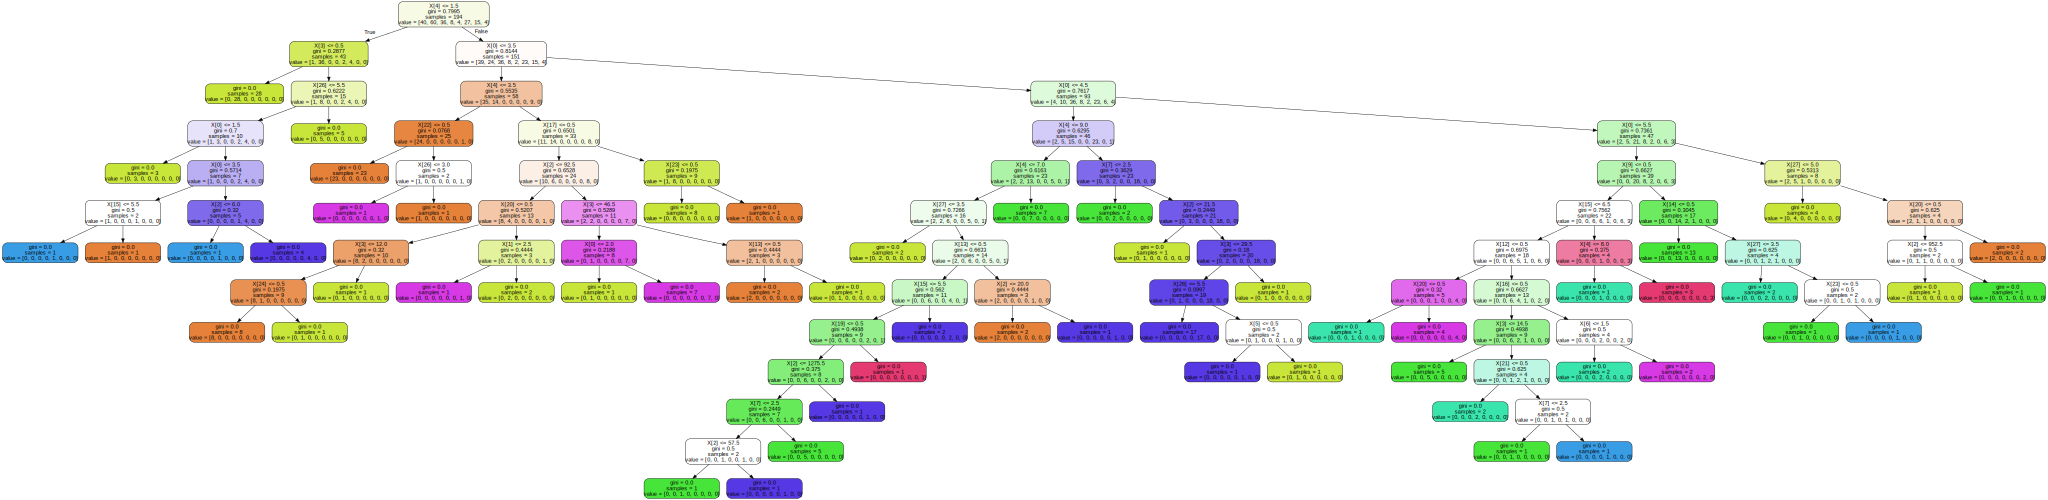

In [80]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                               filled=True, rounded=True) 
graph = graphviz.Source(dot_data)  
graph 